1. Decision Tree
  - a. Non - Parametric
  - b. Mostly used for Classification
  - c. Can be used for Regression as well..!

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
data = pd.read_csv("Automobile_data.csv")

In [ ]:
#Look at the dataset
#Tell me what preprocessings should be done!
#Take time till 9:35am IST

In [20]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [23]:
data.iloc[:,10:15]

,length,width,height,curb-weight,engine-type
0,168.8,64.1,48.8,2548,dohc
1,168.8,64.1,48.8,2548,dohc
2,171.2,65.5,52.4,2823,ohcv
3,176.6,66.2,54.3,2337,ohc
4,176.6,66.4,54.3,2824,ohc
...,...,...,...,...,...
200,188.8,68.9,55.5,2952,ohc
201,188.8,68.8,55.5,3049,ohc
202,188.8,68.9,55.5,3012,ohcv
203,188.8,68.9,55.5,3217,ohc


In [6]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [10]:
num_cols = ['normalized-losses','stroke','bore','horsepower','peak-rpm','price']

In [16]:
for i in num_cols:
  data[i] = pd.to_numeric(data[i],errors = 'coerce')

In [ ]:
data.dtypes

In [25]:
from pandas.api.types import is_string_dtype
for i in data:
  if is_string_dtype(data[i]): #if(str(data[i].dtype) == 'category')
    data[i] = data[i].astype('category').cat.as_unordered()

In [26]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [27]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [28]:
for i in data:
  if(str(data[i].dtype) == 'category'):
    data[i] = data[i].cat.codes

In [29]:
data.dtypes

symboling              int64
normalized-losses    float64
make                    int8
fuel-type               int8
aspiration              int8
num-of-doors            int8
body-style              int8
drive-wheels            int8
engine-location         int8
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type             int8
num-of-cylinders        int8
engine-size            int64
fuel-system             int8
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [30]:
data.fillna(data.median(),inplace = True)

In [31]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,1,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,1,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [34]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [35]:
X = data.drop('symboling', axis = 1)
y = data['symboling']

In [48]:
train_test_split?

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
n_splits =1
strata = StratifiedShuffleSplit(n_splits, test_size = 0.25,random_state = 1)
for train_index, test_index in strata.split(X,y):
  X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
  y_train, y_test = y[train_index],y[test_index]

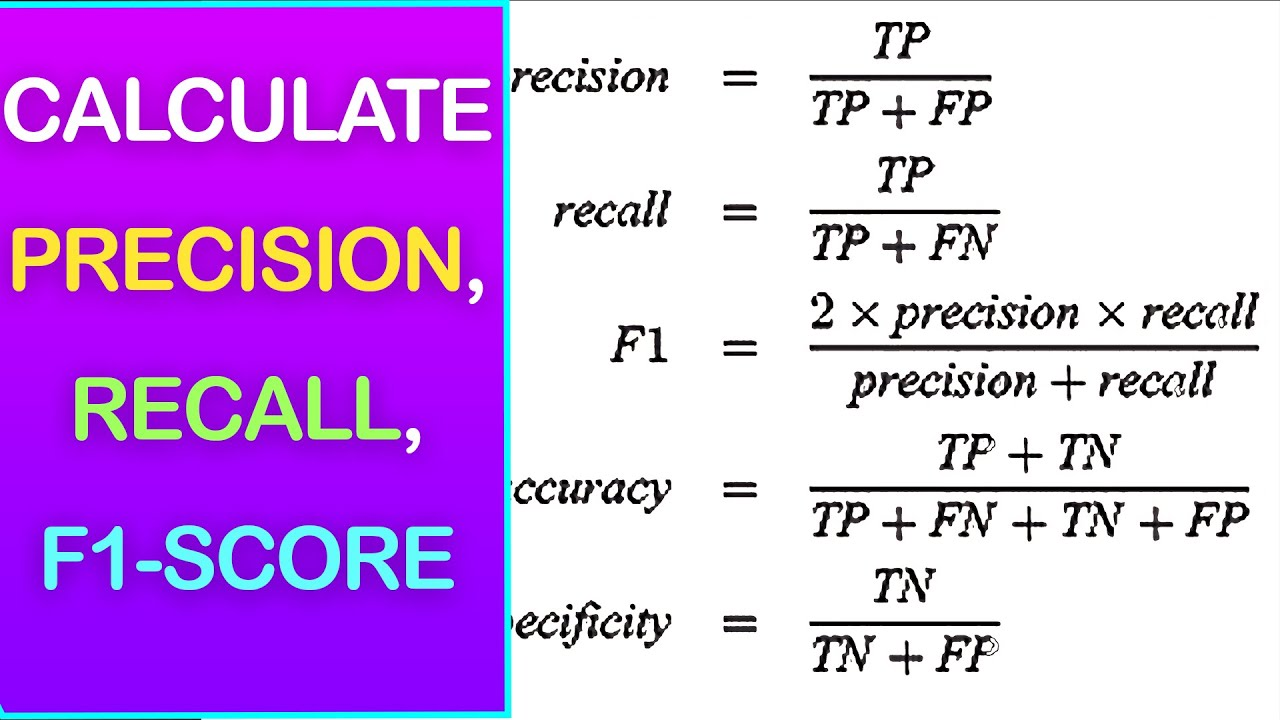

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

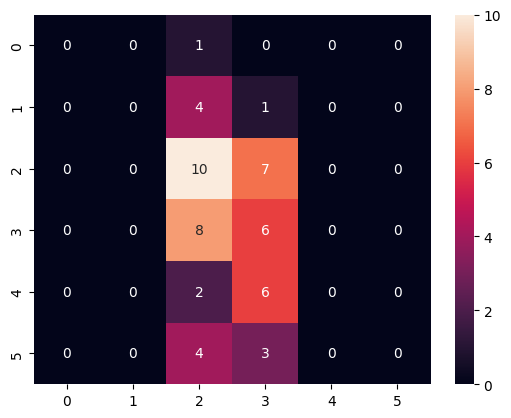

In [54]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_predict), annot = True)

In [55]:
# Imbalance data can hamper our model accuracy big time
print('-'*100)
print("The Accuracy is: ",accuracy_score(y_test,y_predict))
print("The Total f1 score is: ",f1_score(y_test,y_predict,average = 'weighted'))
print('-'*100)

----------------------------------------------------------------------------------------------------
The Accuracy is:  0.3076923076923077
The Total f1 score is:  0.2294585555455121
----------------------------------------------------------------------------------------------------


<Axes: >

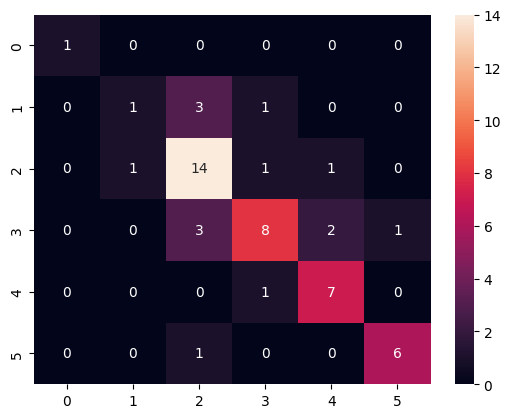

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict = dt.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_predict), annot = True)

In [57]:
# Imbalance data can hamper our model accuracy big time
print('-'*100)
print("The Accuracy is: ",accuracy_score(y_test,y_predict))
print("The Total f1 score is: ",f1_score(y_test,y_predict,average = 'weighted'))
print('-'*100)

----------------------------------------------------------------------------------------------------
The Accuracy is:  0.7115384615384616
The Total f1 score is:  0.6949444123128333
----------------------------------------------------------------------------------------------------


In [ ]:
total_correct / Total_values